<a href="https://colab.research.google.com/github/corvusMidnight/DutchSpeechDetectionResources/blob/main/Speech_recognition_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models evaluation
A notebook to showcase XLSR Wav2Vec2 Dutch and WHisper performance on two datasets:
- Common Voice Dataset (CVD)
- PolyAI Dutch (PAD)

The models are evaluated on the first 100 samples of each dataset due to 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !git clone https://github.com/corvusMidnight/DutchSpeechDetectionResources
# %cd DutchSpeechDetectionResources

Cloning into 'DutchSpeechDetectionResources'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 142 (delta 31), reused 18 (delta 18), pack-reused 102
Receiving objects: 100% (142/142), 202.32 KiB | 7.49 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/DutchSpeechDetectionResources


In [ ]:
!ls

dataframes	  __pycache__  speech_recognition_script.py
model_evaluation  README.md    testing_models.ipynb


In [ ]:
%%capture
import pandas as pd
!pip install Levenshtein

# Import functions directly from GitHub
from speech_recognition_script import plot_wrr_er, word_recognition, levenshtein_distance

# Common Voice 

## Overview

The following section highlights whether the ouput of the model is identical (green) or different (red) from the corresponding reference sentence.

In [ ]:
df = pd.read_csv('/content/DutchSpeechDetectionResources/dataframes/CVD_models_output.csv')

In [ ]:
df

,reference sentences CVD,XLSR Wav2Vec2 Dutch,Whisper by OpeanAI
0,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven
1,de bezorgtijd is dan wel minstens vier weken,de bezorgtijd is dan wel minstens vier weken,de bezorgdheid is dan wel minstens vier weken
2,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...
3,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...
4,de regenpijp lekt weer,de regenpijp lekt weer,de regenpijp lekt weer
...,...,...,...
95,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk wil je op eindelij...
96,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...
97,centrale verwarming is een recent fenomeen,centrale verwarming is een recent fenomeen,centralna vervarming je en recente fenomen
98,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen


In [ ]:
df.iloc[:, 0:2].style.apply(lambda x: ["background: red" if v != x.iloc[0] else "background: green" for v in x], axis = 1)


,reference sentences CVD,XLSR Wav2Vec2 Dutch
0,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven
1,de bezorgtijd is dan wel minstens vier weken,de bezorgtijd is dan wel minstens vier weken
2,de dolfijnen sprongen uit het water voor de boeg van het schip,de dolfijnen sprongen uit het water voor de boeg van het schip
3,het vermiste jongetje droeg een geel tshirt op de dag van de verdwijning,het vermiste jongetje droeg een geel tshirt op de dag van de verdwijning
4,de regenpijp lekt weer,de regenpijp lekt weer
5,met knikkende knieën liep ik het kantoor binnen,met knikkende knieën liep ik het kantoor binnen
6,ze brak haar arm op meerdere plekken,ze brak haar arm op meerdere plekken
7,de smartphone maakte een gek geluid,de smartphone maakte een gek geluid
8,ik ben vergeten een cadeau te kopen,ik ben vergeten een cadeau te kopen
9,we moeten nog met de hond gaan wandelen,we moeten nog met de hond gaan wandelen


In [ ]:
df.iloc[:, [0, 2]].style.apply(lambda x: ["background: red" if v != x.iloc[0] else "background: green" for v in x], axis = 1)


,reference sentences CVD,Whisper by OpeanAI
0,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven
1,de bezorgtijd is dan wel minstens vier weken,de bezorgdheid is dan wel minstens vier weken
2,de dolfijnen sprongen uit het water voor de boeg van het schip,de dolfijnen sprongen uit het water voor de boeg van het schip
3,het vermiste jongetje droeg een geel tshirt op de dag van de verdwijning,het vermiste jongetje droeg een geel tshirt op de dag van de verdwijning
4,de regenpijp lekt weer,de regenpijp lekt weer
5,met knikkende knieën liep ik het kantoor binnen,met knikkende knieën liep ik het contour binnen
6,ze brak haar arm op meerdere plekken,ze brak haar arm op meerdere plekken
7,de smartphone maakte een gek geluid,de smartphone maakt een gek geluid
8,ik ben vergeten een cadeau te kopen,ik ben vergeten een cadeau te kopen
9,we moeten nog met de hond gaan wandelen,we moeten nog met de hond gaan wandelen


## Levershtein distance

The Levenshtein distance (LD) is a measure of the similarity between two strings: the source string (s) and the target string (t). In the context of speech recognition, it is often used to measure the similarity between a hypothesis transcript, which is the output of an automatic speech recognition system, and a reference transcript, which is the ground truth. The Levenshtein distance is computed as the minimum number of edit operations (insertions, deletions, and substitutions) required to transform the hypothesis transcript into the reference transcript. The Levenshtein algorithm is here used to highligth said differences: in the string in the two addition Levenshtein columns, deletions are highlighted using underscores ('_'),
substitutions using parentheses ('()'), and insertions with ankle brackets ('<>').


In [ ]:
df_1 = pd.read_csv('DutchSpeechDetectionResources/dataframes/CVD_performance.csv')


In [ ]:
df_1

,reference sentences CVD,XLSR Wav2Vec2 Dutch,Whisper by OpeanAI,XLSR_Levenshtein,Whisper_Levenshtein
0,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven
1,de bezorgtijd is dan wel minstens vier weken,de bezorgtijd is dan wel minstens vier weken,de bezorgdheid is dan wel minstens vier weken,de bezorgtijd is dan wel minstens vier weken,de bezorg(e)<d>_ijd is dan wel minstens vier w...
2,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...
3,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...
4,de regenpijp lekt weer,de regenpijp lekt weer,de regenpijp lekt weer,de regenpijp lekt weer,de regenpijp lekt weer
...,...,...,...,...,...
95,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk wil je op eindelij...,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk wil___ je op (e)i(...
96,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...
97,centrale verwarming is een recent fenomeen,centrale verwarming is een recent fenomeen,centralna vervarming je en recente fenomen,centrale verwarming is een recent fenomeen,central(a)e ve(v)warming(j)(e)s _en recen<e>t ...
98,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen


In [ ]:
df = levenshtein_distance(df, 'reference sentences CVD', 'XLSR Wav2Vec2 Dutch')
df = levenshtein_distance(df, 'reference sentences CVD', 'Whisper by OpeanAI')

df

,reference sentences CVD,XLSR Wav2Vec2 Dutch,Whisper by OpeanAI,distance XLSR Wav2Vec2 Dutch,distance Whisper by OpeanAI
0,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven,het containerschip lag aangemeerd in de haven,0,0
1,de bezorgtijd is dan wel minstens vier weken,de bezorgtijd is dan wel minstens vier weken,de bezorgdheid is dan wel minstens vier weken,0,4
2,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...,de dolfijnen sprongen uit het water voor de bo...,0,0
3,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...,het vermiste jongetje droeg een geel tshirt op...,0,0
4,de regenpijp lekt weer,de regenpijp lekt weer,de regenpijp lekt weer,0,0
...,...,...,...,...,...
95,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk willen je op tijde...,de mensen waar ik voor werk wil je op eindelij...,0,6
96,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...,rond arnhem is veel gevochten in de tweede wer...,0,0
97,centrale verwarming is een recent fenomeen,centrale verwarming is een recent fenomeen,centralna vervarming je en recente fenomen,0,8
98,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen,de motten hadden gaten gemaakt in de gordijnen,0,0


## Word recognition error and rate
A common metric of performance visualization are the Word Recogntion and Error rates (WRR, WER). The WRR is computed as the ratio of the number of correctly recognized words in the hypothesis transcript to the total number of words in the reference transcript. It is often expressed as a percentage by multiplying the ratio by 100. The ER is computed as the ratio of the Levenshtein distance to the total number of words in the reference transcript. It is also often expressed as a percentage by multiplying the ratio by 100.

In this case, we again use the Levenshtein distance to faciliate the calculation.

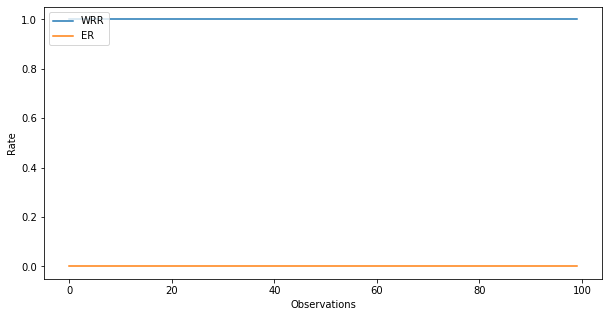

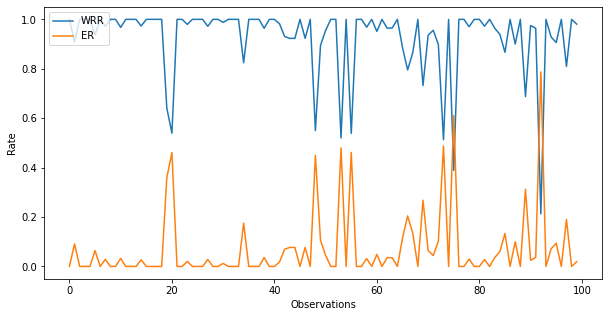

In [ ]:
plot_wrr_er(df, 'reference sentences CVD', 'XLSR Wav2Vec2 Dutch')
plot_wrr_er(df, 'reference sentences CVD', 'Whisper by OpeanAI')


# PolyAI

## Overview

The following section highlights whether the ouput of the model is identical (green) or different (red) from the corresponding reference sentence.

In [ ]:
df = pd.read_csv('/content/DutchSpeechDetectionResources/dataframes/PolyAI_models_output.csv')

In [ ]:
df

,Reference sentence PolyAI,XLSR Wav2Vec2 Dutch,Whisper by OpeanAI
0,ik wil graag mijn kaart blokkeren,ik wil graag mij naar kaart blokkeren,ik wil graag mijn kaart blokkeren
1,hoi mijn pinpas lijkt gestolen te zijn dus ik ...,goei ar mijn pinpels blijkgestolen te zijn dus...,hoi mijn pinpas lijkt gestolen te zijn dus ik ...
2,blokkeer mijn kaart,blokkeer me kaart,blokkeer mijn kaart
3,ik wil graag mijn kaart blokkeren,ik wil graag meen kaart blokkeren,ik wil graag mijn kaart blokkeren
4,zou u alsjeblieft mijn kaart willen blokkeren,zout zou u alstublieft mijn kaart willen blokk...,zou u alsjeblieft mijn kaart willen blokkeren
...,...,...,...
95,goedemorgen ik ben gebruiker van de app van ub...,goedemorgen ik ben gebruiker van de app van uw...,goedemorgen ik ben gebruiker van de app van ub...
96,goedemiddag ik wil met jullie app mijn saldo c...,goedmidag ik wil met de jullie ep mij naar sal...,goedemiddag ik wil met jullie app mijn saldo c...
97,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen
98,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...


In [ ]:
df.iloc[:, 0:2].style.apply(lambda x: ["background: red" if v != x.iloc[0] else "background: green" for v in x], axis = 1)


,Reference sentence PolyAI,XLSR Wav2Vec2 Dutch
0,ik wil graag mijn kaart blokkeren,ik wil graag mij naar kaart blokkeren
1,hoi mijn pinpas lijkt gestolen te zijn dus ik vond het alsof je deze zou kunnen blokkeren,goei ar mijn pinpels blijkgestolen te zijn dus e voo alsof i deze zou kunnen blokkeren
2,blokkeer mijn kaart,blokkeer me kaart
3,ik wil graag mijn kaart blokkeren,ik wil graag meen kaart blokkeren
4,zou u alsjeblieft mijn kaart willen blokkeren,zout zou u alstublieft mijn kaart willen blokkeren
5,hoi kan ik mijn kaart bokeeren,hai kan ik mijn kaart blokkeren
6,ik wil mijn kaart laten blokkeren hoe gaat dat,ik wil me een kaart laten blokkeren hoe gaat dat
7,goedemiddag ik zit een beetje in de stress ik hoop dat u mij snel kan helpen ik zie dat ik 20 euro van mijn rekening afschat van een onbekende persoon tenminste ik heb zelf de transactie niet gedaan en ik ken ook helemaal niet dat het zon buitenlandse rekening is in boek weet je wel dat dit onbetrouwbaar is het gaat nu om 20 euro dus dat is nog wel te doen maar kunt u zo snel mogelijk mijn kaart gewoon blokkeren en gewoon bevriezen ik weet niet hoe je dit doet,goede middaggej ik zit een beetje in de stres cope turmije snel kan helpen wanteer zie met dat een twintig eurovermirekening afshud van onbekente persoonlijkmistiek heb zelfde transactieniet gebaal en e kenk hermalniet met de zanbuitenlandse rekeninguargezindertien boeke beetje luide te wiisin om betaalbaar ganieuwteintigeuro is dus nog wat te doen maar kunt u zo snel mog ik mijn kaartgehomblokkeren en gal ofr bevrieselijk ennietdoedennoe vergonnis pnier vat zorgen dat u niks meer afgehald kan worden wat ja berekening is ofe in handen van andere mensen moorhokinggewedet zelf ook niet kunturen iie geval daarmee beginnen en naar een danamisschien kunt u de transactie terugboeken want dit is niet mij nan betalingboekenkwestie
8,ik wil mijn kaart blokkeren,ik wil mijn kaart blokkeren
9,ik wil mijn bankpas laten blokkeren,ik wil mijn bankpas laten blokkeren


In [ ]:
df.iloc[:, [0, 2]].style.apply(lambda x: ["background: red" if v != x.iloc[0] else "background: green" for v in x], axis = 1)


,Reference sentence PolyAI,Whisper by OpeanAI
0,ik wil graag mijn kaart blokkeren,ik wil graag mijn kaart blokkeren
1,hoi mijn pinpas lijkt gestolen te zijn dus ik vond het alsof je deze zou kunnen blokkeren,hoi mijn pinpas lijkt gestolen te zijn dus ik vond het alsof je deze zou kunnen blokkeren
2,blokkeer mijn kaart,blokkeer mijn kaart
3,ik wil graag mijn kaart blokkeren,ik wil graag mijn kaart blokkeren
4,zou u alsjeblieft mijn kaart willen blokkeren,zou u alsjeblieft mijn kaart willen blokkeren
5,hoi kan ik mijn kaart bokeeren,hoi kan ik mijn kaart bokeeren
6,ik wil mijn kaart laten blokkeren hoe gaat dat,ik wil mijn kaart laten blokkeren hoe gaat dat
7,goedemiddag ik zit een beetje in de stress ik hoop dat u mij snel kan helpen ik zie dat ik 20 euro van mijn rekening afschat van een onbekende persoon tenminste ik heb zelf de transactie niet gedaan en ik ken ook helemaal niet dat het zon buitenlandse rekening is in boek weet je wel dat dit onbetrouwbaar is het gaat nu om 20 euro dus dat is nog wel te doen maar kunt u zo snel mogelijk mijn kaart gewoon blokkeren en gewoon bevriezen ik weet niet hoe je dit doet,goedemiddag ik zit een beetje in de stress ik hoop dat u mij snel kan helpen ik zie dat ik 20 euro van mijn rekening afschat van een onbekende persoon tenminste ik heb zelf de transactie niet gedaan en ik ken ook helemaal niet dat het zon buitenlandse rekening is in boek weet je wel dat dit onbetrouwbaar is het gaat nu om 20 euro dus dat is nog wel te doen maar kunt u zo snel mogelijk mijn kaart gewoon blokkeren en gewoon bevriezen ik weet niet hoe je dit doet
8,ik wil mijn kaart blokkeren,ik wil mijn kaart blokkeren
9,ik wil mijn bankpas laten blokkeren,ik wil mijn bankpas laten blokkeren


## Levershtein distance



In [ ]:
df_1 = pd.read_csv('/content/DutchSpeechDetectionResources/dataframes/PolyAI_performance.csv')


In [ ]:
df_1

,Reference sentence PolyAI,XLSR Wav2Vec2 Dutch,Whisper by OpeanAI,Whisper by OpeanAI_Levenshtein,XLSR Wav2Vec2 Dutch_Levenshtein
0,ik wil graag mijn kaart blokkeren,ik wil graag mij naar kaart blokkeren,ik wil graag mijn kaart blokkeren,ik wil graag mijn kaart blokkeren,ik wil graag mij< ><r><a><a>n kaart blokkeren
1,hoi mijn pinpas lijkt gestolen te zijn dus ik ...,goei ar mijn pinpels blijkgestolen te zijn dus...,hoi mijn pinpas lijkt gestolen te zijn dus ik ...,hoi mijn pinpas lijkt gestolen te zijn dus ik ...,(g)o<e>i< ><r><a> mijn (l)pi<b>npa__lijkt gest...
2,blokkeer mijn kaart,blokkeer me kaart,blokkeer mijn kaart,blokkeer mijn kaart,blokkeer m(e)__ kaart
3,ik wil graag mijn kaart blokkeren,ik wil graag meen kaart blokkeren,ik wil graag mijn kaart blokkeren,ik wil graag mijn kaart blokkeren,ik wil graag m(e)(e)n kaart blokkeren
4,zou u alsjeblieft mijn kaart willen blokkeren,zout zou u alstublieft mijn kaart willen blokk...,zou u alsjeblieft mijn kaart willen blokkeren,zou u alsjeblieft mijn kaart willen blokkeren,zou<t><o><z>< ><u> (t)(u)alsjeblieft mijn kaar...
...,...,...,...,...,...
95,goedemorgen ik ben gebruiker van de app van ub...,goedemorgen ik ben gebruiker van de app van uw...,goedemorgen ik ben gebruiker van de app van ub...,goedemorgen ik ben gebruiker van de app van ub...,goedemorgen ik ben gebruiker van de app van u<...
96,goedemiddag ik wil met jullie app mijn saldo c...,goedmidag ik wil met de jullie ep mij naar sal...,goedemiddag ik wil met jullie app mijn saldo c...,goedemiddag ik wil met jullie app mijn saldo c...,goed_mid_ag ik wil met < ><e><d>jull(e)e_app <...
97,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen
98,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...


In [ ]:
df = levenshtein_distance(df, 'Reference sentence PolyAI', 'XLSR Wav2Vec2 Dutch')
df = levenshtein_distance(df, 'Reference sentence PolyAI', 'Whisper by OpeanAI')

df

,Reference sentence PolyAI,XLSR Wav2Vec2 Dutch,Whisper by OpeanAI,distance XLSR Wav2Vec2 Dutch,distance Whisper by OpeanAI
0,ik wil graag mijn kaart blokkeren,ik wil graag mij naar kaart blokkeren,ik wil graag mijn kaart blokkeren,4,0
1,hoi mijn pinpas lijkt gestolen te zijn dus ik ...,goei ar mijn pinpels blijkgestolen te zijn dus...,hoi mijn pinpas lijkt gestolen te zijn dus ik ...,20,0
2,blokkeer mijn kaart,blokkeer me kaart,blokkeer mijn kaart,3,0
3,ik wil graag mijn kaart blokkeren,ik wil graag meen kaart blokkeren,ik wil graag mijn kaart blokkeren,2,0
4,zou u alsjeblieft mijn kaart willen blokkeren,zout zou u alstublieft mijn kaart willen blokk...,zou u alsjeblieft mijn kaart willen blokkeren,7,0
...,...,...,...,...,...
95,goedemorgen ik ben gebruiker van de app van ub...,goedemorgen ik ben gebruiker van de app van uw...,goedemorgen ik ben gebruiker van de app van ub...,36,0
96,goedemiddag ik wil met jullie app mijn saldo c...,goedmidag ik wil met de jullie ep mij naar sal...,goedemiddag ik wil met jullie app mijn saldo c...,23,0
97,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen,ik zou graag een rekening willen betalen,0,0
98,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...,ik wil graag een rekening betalen kunt u mij h...,0,0


## Word recognition error and rate

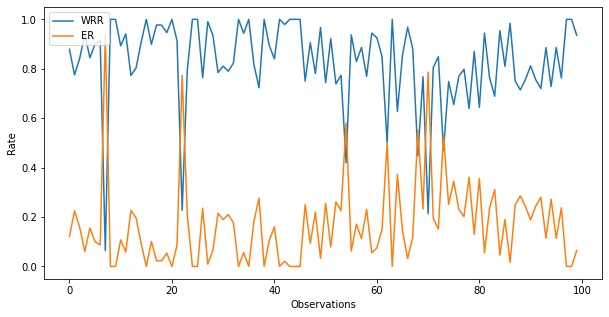

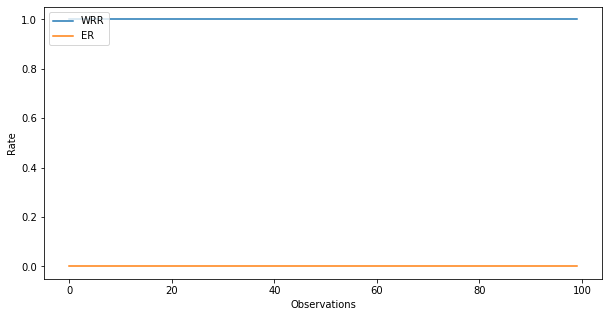

In [ ]:
plot_wrr_er(df, 'Reference sentence PolyAI', 'XLSR Wav2Vec2 Dutch')
plot_wrr_er(df, 'Reference sentence PolyAI', 'Whisper by OpeanAI')


# Resouces

* [Amazon Research Center](https://colab.research.google.com/drive/1SwnADGd3GprRU65nMLmHDlPMup106NG6#scrollTo=FGo7V-InLFXv&line=3&uniqifier=1)

* [Levenshtein package documentation](https://maxbachmann.github.io/Levenshtein/levenshtein.html#distance)

* [The Aurora Experimental Framework for the Performance Evaluation of Speech Recognition Systems Under Noisy Conditions](http://194.94.121.162/papers/asr2000_final_footer.pdf)

* [The Performance Evaluation of Speech Recognition by Comparative Approach](https://www.intechopen.com/chapters/39035)

* [Evaluation of the efficiency of state-of-the-art Speech Recognition engines](https://www.sciencedirect.com/science/article/pii/S1877050922014338)